In [61]:
import numpy as np

import pandas as pd

In [62]:
pwd

'/Users/tissa2/Desktop/Springborad/Springboard'

In [63]:
df = pd.read_csv('/Users/tissa2/Downloads/adult.csv',na_values=['#NAME?'])

In [64]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [65]:
# Assign outcome as 0 if income <=50k and as 1 if income >50k
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]

# Assign X as a Dataframe of features and y as a Series of the outcome variable
X = df.drop('income', 1)
y = df.income

In [66]:
print(X.head(5))

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country  
0  

In [67]:
print(y.head(5))

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64


# Basic data cleaning

In [68]:
# Eductaion is a categorical feature:
print(X['education'].head(5))

0            11th
1         HS-grad
2      Assoc-acdm
3    Some-college
4    Some-college
Name: education, dtype: object


In [69]:
# Use get_dummies in pandas
# Another option: OneHotEncoder in sci-kit learn
print(pd.get_dummies(X['education']).head(5))

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     1     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           1          0   
3     0     0     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          0          0        0        0          0            0   
1          0          0        1        0          0            0   
2          0          0        0        0          0            0   
3          0          0        0        0          0            0   
4          0          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             1  
4             1  


In [70]:
# Decide which categorical variable you want to use in the model

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print(f"Feature {col_name} has {unique_cat} unique categories")

Feature workclass has 9 unique categories
Feature education has 16 unique categories
Feature marital-status has 7 unique categories
Feature occupation has 15 unique categories
Feature relationship has 6 unique categories
Feature race has 5 unique categories
Feature gender has 2 unique categories
Feature native-country has 42 unique categories


In [71]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [72]:
# Although, 'native_country' has a lot of unique categories, most categories only have a few observation
print(X['native-country'].value_counts().sort_values(ascending=False).head(10))

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: native-country, dtype: int64


In [73]:
# In this case, bucket low frequency categories as 'other'
X['native-country'] = ['United-States' if x == 'United-States' else 'Other' for x in X['native-country']]

print(X['native-country'].value_counts().sort_values(ascending=False))

United-States    43832
Other             5010
Name: native-country, dtype: int64


In [74]:
# Create a list of dummy list
todummy_list = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']

In [75]:
# function to dummy all the categorical variables used for mdeling 

def dummy_df(df,todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis=1)
    return df

In [76]:
X = dummy_df(X,todummy_list)
print(X.head())

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            0                      0                    0   
1            0                      0                    0   
2            0                      0                    1   
3            0                      0                    0   
4            1                      0                    0   

   workclass_Never-worked  ...  relationship_Wife  race_Amer-Indian-Eskimo  \
0                       0  ...                  0                        0

# Handing missing values

In [77]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).tail()

occupation_Adm-clerical     0
occupation_?                0
marital-status_Widowed      0
marital-status_Separated    0
age                         0
dtype: int64

In [34]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X),columns=X.columns)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
# Now check again to see if you still have missing data
X.isnull().sum().sort_values(ascending=False).tail()

occupation_Adm-clerical     0
occupation_?                0
marital-status_Widowed      0
marital-status_Separated    0
age                         0
dtype: int64

# More Data Explorarion

# Outlier detection

# Tukey IQR

In [20]:
def find_outliers_turkey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    floor = q1-1.5*iqr
    ceiling = q3+1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices,outlier_values

In [21]:
turkey_indices, turkey_values = find_outliers_turkey(X['age'])
print(np.sort(turkey_values))

[79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79
 79 79 79 79 79 79 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 81 81 81 81
 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81
 81 81 81 81 81 81 81 81 81 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82
 83 83 83 83 83 83 83 83 83 83 83 84 84 84 84 84 84 84 84 84 84 84 84 84
 85 85 85 85 85 86 87 87 87 88 88 88 88 88 88 89 89 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90]


# Kernel Density Estimation

In [22]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott',fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred<0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind,outlier_value


In [ ]:
kde_indices, kde_values = find_outliers_kde(X['age'])
print(np.sort(kde_values))

# Distribution of Feature

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x,bins=10,color='gray', histtype='bar',alpha=0.5,rwidth=0.96)
    plt.title(f'Histogram of {x.name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


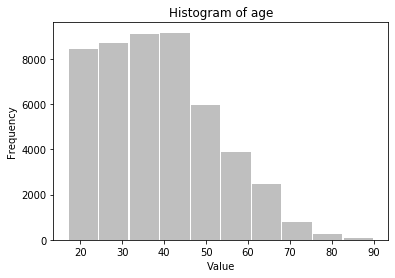

In [79]:
plot_histogram(X['age'])

In [80]:
# plot histogram to show distribution of features by DV categories

def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]),alpha=0.5,rwidth=0.96,label='DV=0')
    plt.hist(list(x[y==1]),alpha=0.5,rwidth=0.96,label='DV=1')
    plt.title(f'Histogram of {x.name} by DV Category')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

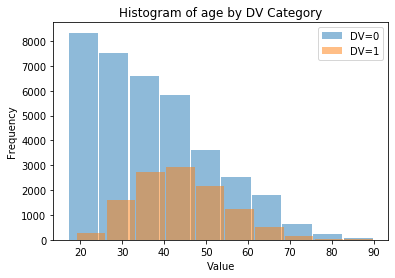

In [81]:
plot_histogram_dv(X['age'],y)

# Feature Engineering

# Interactions amongst feature 

In [83]:
# Use polynomialFeatures in sklearn.preprocessing to create two-way interactions for all  features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns)+['-'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True,include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values
    noint_indices = [i for i,x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices],axis=1)
    
    return df
    

In [84]:
X = add_interactions(X)
print(X.head(5))

    age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  25.0  226802.0              7.0           0.0           0.0   
1  38.0   89814.0              9.0           0.0           0.0   
2  28.0  336951.0             12.0           0.0           0.0   
3  44.0  160323.0             10.0        7688.0           0.0   
4  18.0  103497.0             10.0           0.0           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            40.0          0.0                    0.0                  0.0   
1            50.0          0.0                    0.0                  0.0   
2            40.0          0.0                    0.0                  1.0   
3            40.0          0.0                    0.0                  0.0   
4            30.0          1.0                    0.0                  0.0   

   workclass_Never-worked  ...  race_Other-native-country_Other  \
0                     0.0  ...                              0.0   


# Dimensionality reduction using PCA

In [85]:
# Use PCA from sklearn.decomposition to find principle components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

print(X_pca.head(5))

              0             1             2             3             4  \
0 -2.017217e+08 -1.667885e+07  1.873905e+05 -2.091049e+06 -3.544552e+05   
1 -2.017239e+08 -1.672363e+07 -4.771779e+06 -6.290287e+05 -3.632957e+05   
2 -2.017189e+08 -1.662251e+07  6.289177e+06 -2.365242e+06  1.158349e+06   
3  1.030840e+09 -1.504992e+07 -1.372122e+06  7.329805e+05 -1.450348e+05   
4 -2.017248e+08 -1.674194e+07 -6.785342e+06 -8.440193e+05  1.839778e+05   

              5              6              7             8             9  
0  24953.577842  103135.759640 -187428.148055 -64842.559054  70005.544662  
1  40006.136754  -95078.470063    -933.487002  34064.272075  39955.774634  
2 -46306.506772 -436786.629900  133288.410062 -11826.050275  18518.318203  
3 -85369.487210 -120519.290349   -2675.257147  26700.157438  -5948.201200  
4  37700.998250   59157.264886   34901.944126  -5316.014217 -73609.516275  


# Feature selection and model building

In [88]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [89]:
# The total number of features have grown substantially after dumming and adding interactions terms
print(df.shape)
print(X.shape)

(48842, 15)
(48842, 1891)


In [90]:
# Such a large set of features can cause overfitting and also slow computing
# Use features selection to select the most import features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 350  663  824  829  834  992 1127 1164 1208 1315 1324 1327 1437 1628
 1631] are constant.
  UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [91]:
colnames_selected

['educational-num',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age-educational-num',
 'age-marital-status_Married-civ-spouse',
 'age-relationship_Husband',
 'fnlwgt-marital-status_Married-civ-spouse',
 'fnlwgt-relationship_Husband',
 'educational-num-hours-per-week',
 'educational-num-marital-status_Married-civ-spouse',
 'educational-num-relationship_Husband',
 'hours-per-week-marital-status_Married-civ-spouse',
 'hours-per-week-relationship_Husband',
 'marital-status_Married-civ-spouse-relationship_Husband',
 'marital-status_Married-civ-spouse-race_White',
 'marital-status_Married-civ-spouse-gender_Male',
 'marital-status_Married-civ-spouse-native-country_United-States',
 'relationship_Husband-race_White',
 'relationship_Husband-gender_Male',
 'relationship_Husband-native-country_United-States']

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train,y_train,X_test,y_test):
    model = LogisticRegression()
    model.fit(X_train,y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test,y_hat)
    
    return auc

In [93]:
auc_processed = find_model_perf(X_train_selected,y_train,X_test_selected,y_test)
print(auc_processed)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8530851392379997


# Build model using unprocessed data

In [94]:
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0,how='any')
print(df.shape)
print(df_unprocessed.shape)

(48842, 15)
(48842, 15)


In [95]:
# Remove non-numeric columns so model does not throw an error
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32','int64','float32','float64']:
        df_unprocessed = df_unprocessed.drop(col_name,1)

In [97]:
# Split into features and outcomes

X_unprocessed = df_unprocessed.drop('income',1)
y_unprocessed = df_unprocessed.income

In [98]:
# Take a look again at what the unprocessed feature set looks like
print(X_unprocessed.head(5))

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
4   18  103497               10             0             0              30


In [99]:
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(X_unprocessed, y, test_size=0.30, random_state=1)

In [100]:
auc_unprocessed = find_model_perf(X_train_unprocessed,y_train,X_test_unprocessed,y_test)
print(auc_unprocessed)

0.5815175805421587


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
# Compare model performance
print(f"AUC of the model with preprocessing: {auc_processed}")
print(f"AUC of the model without preprocessing: {auc_unprocessed}")
per_improve = ((auc_processed-auc_unprocessed)/auc_unprocessed)*100

print(f'Model improvment of preprocessing: {per_improve}')


AUC of the model with preprocessing: 0.8530851392379997
AUC of the model without preprocessing: 0.5815175805421587
Model improvment of preprocessing: 46.69980199784396
